In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/erita/OneDrive/Documents/Capstone/Heart_Disease_Classification_Dataset_Cleaned.csv')
print(df)

     Unnamed: 0.1  Unnamed: 0  age  sex  cp    trestbps   chol  fbs  restecg  \
0               0           0   63    1   3  145.000000  233.0    1        0   
1               1           1   37    1   2  130.000000  250.0    0        1   
2               2           2   41    0   1  130.000000  204.0    0        0   
3               3           3   56    1   1  120.000000  236.0    0        1   
4               4           4   57    0   0  131.894925  354.0    0        1   
..            ...         ...  ...  ...  ..         ...    ...  ...      ...   
298           298         298   57    0   0  140.000000  241.0    0        1   
299           299         299   45    1   3  110.000000  264.0    0        1   
300           300         300   68    1   0  144.000000  193.0    1        1   
301           301         301   57    1   0  127.934644  131.0    0        1   
302           302         302   57    0   1  130.000000  236.0    0        0   

     thalach  exang  oldpeak  slope  ca

In [3]:
df1 = df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'])
print(df1)

     age  sex  cp    trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3  145.000000  233.0    1        0    150.0      0      2.3   
1     37    1   2  130.000000  250.0    0        1    187.0      0      3.5   
2     41    0   1  130.000000  204.0    0        0    172.0      0      1.4   
3     56    1   1  120.000000  236.0    0        1    178.0      0      0.8   
4     57    0   0  131.894925  354.0    0        1    163.0      1      0.6   
..   ...  ...  ..         ...    ...  ...      ...      ...    ...      ...   
298   57    0   0  140.000000  241.0    0        1    123.0      1      0.2   
299   45    1   3  110.000000  264.0    0        1    132.0      0      1.2   
300   68    1   0  144.000000  193.0    1        1    141.0      0      3.4   
301   57    1   0  127.934644  131.0    0        1    115.0      1      1.2   
302   57    0   1  130.000000  236.0    0        0    174.0      0      0.0   

     slope  ca  thal  target  
0        0   0     1

In [4]:
X = df1.iloc[:, 0:13]
y_label = df1.iloc[:, 13]

X_train, X_test, y_train, y_test = train_test_split(X, y_label, train_size = 0.7, stratify = y_label, random_state = 123)

0.9339622641509434
DecisionTreeClassifier(max_depth=5)
Acc. Score on Test : 0.7802197802197802


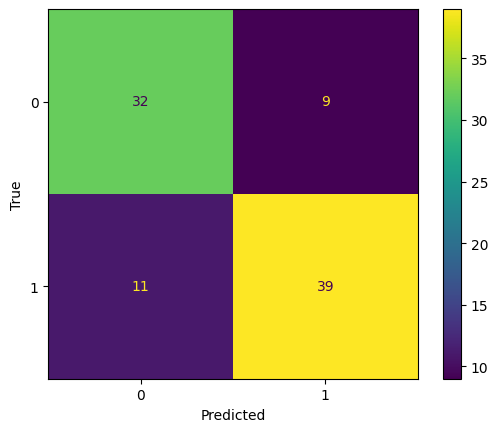

In [5]:
# Decision Tree Classifier

parameters = {'max_depth':(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)} 
dtc = DecisionTreeClassifier() 
clf = GridSearchCV(dtc, parameters) 
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_estimator_)

y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

print('Acc. Score on Test :', accuracy_score(y_test, y_pred))

0.7405660377358491
KNeighborsClassifier(n_neighbors=9)
Acc. Score on Test : 0.6153846153846154


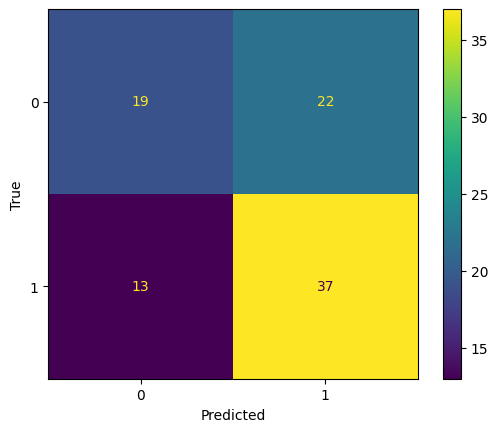

In [6]:
# KNN

parameters = {'n_neighbors':(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)}
knn = KNeighborsClassifier() 
clf = GridSearchCV(knn, parameters) 
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_estimator_)

y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

print('Acc. Score on Test :', accuracy_score(y_test, y_pred))

0.8537735849056604
LinearSVC(C=1)
Acc. Score on Test : 0.8461538461538461


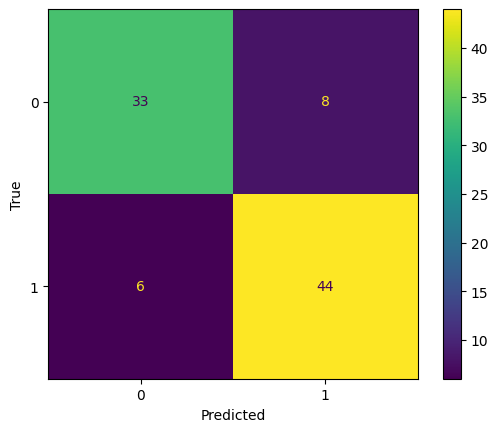

In [7]:
# SVC

parameters = {'C':(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)} 
svc = LinearSVC() 
clf = GridSearchCV(svc, parameters) 
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_estimator_)

y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

print('Acc. Score on Test :', accuracy_score(y_test, y_pred))

0.839622641509434
Acc. Score on Test : 0.8131868131868132


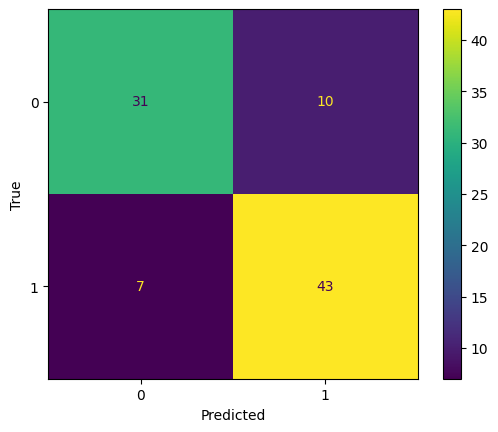

In [8]:
# GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))

y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

print('Acc. Score on Test :', accuracy_score(y_test, y_pred))

1.0
RandomForestClassifier()
Acc. Score on Test : 0.8461538461538461


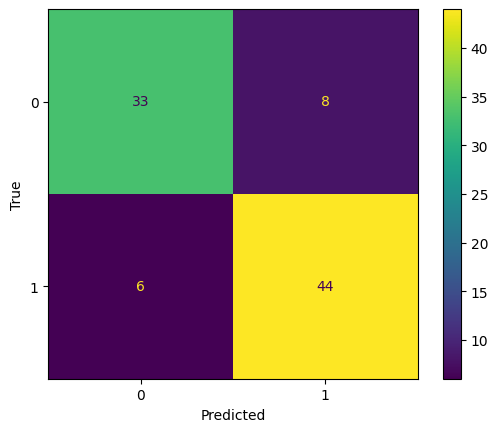

In [9]:
# Random Forest

parameters = {'n_estimators':(10, 50, 100)}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters) 
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_estimator_)

y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

print('Acc. Score on Test :', accuracy_score(y_test, y_pred))

0.8726415094339622
AdaBoostClassifier(learning_rate=0.1)
Acc. Score on Test : 0.8681318681318682


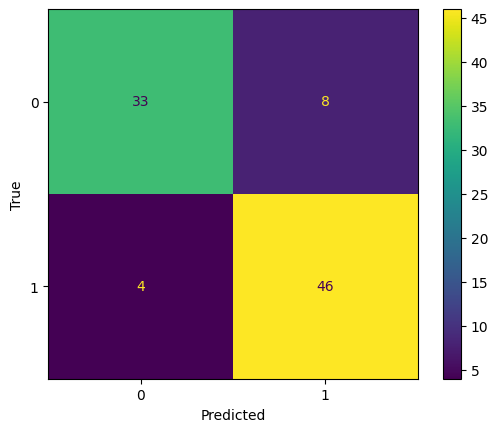

In [10]:
# AdaBoost

parameters = {'learning_rate':(0.01, 0.1, 0.5, 1, 2), 'n_estimators':(10, 50, 100)}
ada = AdaBoostClassifier()
clf = GridSearchCV(ada, parameters)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_estimator_)

y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

print('Acc. Score on Test :', accuracy_score(y_test, y_pred))

1.0
BaggingClassifier(max_features=0.5, max_samples=0.75, n_estimators=100)
Acc. Score on Test : 0.8461538461538461


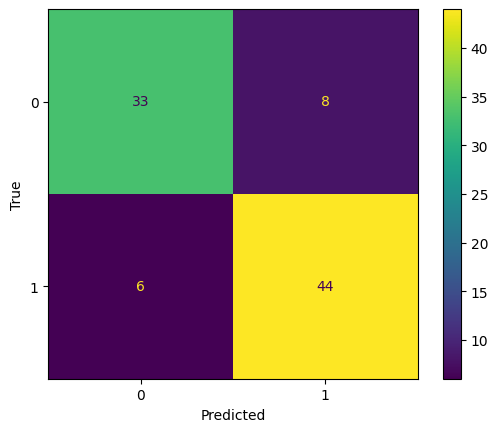

In [11]:
# Bagging Classifier

parameters = {'n_estimators':(10, 50, 100), 'max_samples':(0.25, 0.5, 0.75, 1), 'max_features':(0.25, 0.5, 0.75, 1)}
bc = BaggingClassifier()
clf = GridSearchCV(bc, parameters)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_estimator_)

y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

print('Acc. Score on Test :', accuracy_score(y_test, y_pred))

In [12]:
clf1H = DecisionTreeClassifier(max_depth = 5)
#clf2H = KNeighborsClassifier(n_neighbors = 9)
#clf3H = SVC(C = 1)
#clf4H = GaussianNB()
clf5H = RandomForestClassifier(n_estimators = 50)
clf6H = AdaBoostClassifier(learning_rate = 0.1, n_estimators = 10)
clf7H = BaggingClassifier(n_estimators = 100, max_samples = 0.25, max_features = 0.75)
eclfH = VotingClassifier(estimators = [('dt', clf1H), ('rf', clf5H), ('ada', clf6H), ('bc', clf7H)],
                        voting = 'hard', weights = [2, 2, 1, 2]) 

clf1H = clf1H.fit(X_train, y_train)
#clf2H = clf2H.fit(X_train, y_train)
#clf3H = clf3H.fit(X_train, y_train)
#clf4H = clf4H.fit(X_train, y_train)
clf5H = clf5H.fit(X_train, y_train)
clf6H = clf6H.fit(X_train, y_train)
clf7H = clf7H.fit(X_train, y_train)
eclfH = eclfH.fit(X_train, y_train)

print(clf1H.score(X_train, y_train))
#print(clf2H.score(X_train, y_train))
#print(clf3H.score(X_train, y_train))
#print(clf4H.score(X_train, y_train))
print(clf5H.score(X_train, y_train))
print(clf6H.score(X_train, y_train))
print(clf7H.score(X_train, y_train))
print(eclfH.score(X_train, y_train))

0.9339622641509434
1.0
0.8301886792452831
0.9433962264150944
0.9716981132075472


In [13]:
clf1S = DecisionTreeClassifier(max_depth = 6)
#clf2S = KNeighborsClassifier(n_neighbors = 9)
#clf3S = LinearSVC(C = 1)
#clf4S = GaussianNB()
clf5S = RandomForestClassifier(n_estimators = 50)
clf6S = AdaBoostClassifier(learning_rate = 0.5, n_estimators = 10)
clf7S = BaggingClassifier(n_estimators = 100, max_samples = 0.25, max_features = 0.25)
eclfS = VotingClassifier(estimators = [('dt', clf1S), ('rf', clf5S), ('ada', clf6S), ('bc', clf7S)],
                        voting = 'soft', weights = [2, 2, 0.5, 2]) #get an error if # of weights does not match # of estimators

clf1S = clf1S.fit(X_train, y_train)
#clf2S = clf2S.fit(X_train, y_train)
#clf3S = clf3S.fit(X_train, y_train)
#clf4S = clf4S.fit(X_train, y_train)
clf5S = clf5S.fit(X_train, y_train)
clf6S = clf6S.fit(X_train, y_train)
clf7S = clf7S.fit(X_train, y_train)
eclfS = eclfS.fit(X_train, y_train)

print(clf1S.score(X_train, y_train))
#print(clf2S.score(X_train, y_train))
#print(clf3S.score(X_train, y_train))
#print(clf4S.score(X_train, y_train))
print(clf5S.score(X_train, y_train))
print(clf6S.score(X_train, y_train))
print(clf7S.score(X_train, y_train))
print(eclfS.score(X_train, y_train))

0.9575471698113207
1.0
0.8490566037735849
0.9481132075471698
0.9858490566037735


Acc. Score : 0.8131868131868132
F1 Score : 0.8316831683168316


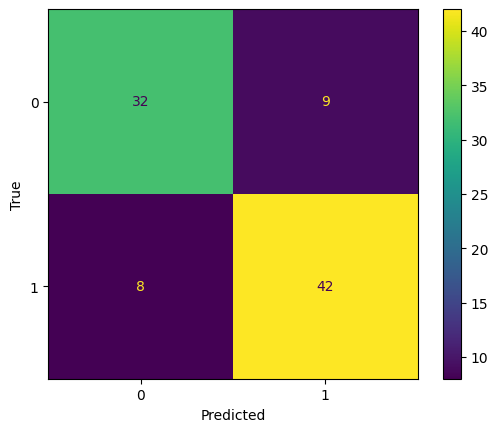

In [14]:
y_pred_1H = clf1H.predict(X_test)
#y_pred_2H = clf2H.predict(X_test)
#y_pred_3H = clf3H.predict(X_test)
#y_pred_4H = clf4H.predict(X_test)
y_pred_5H = clf5H.predict(X_test)
y_pred_6H = clf6H.predict(X_test)
y_pred_7H = clf7H.predict(X_test)
y_pred_ensembleH = eclfH.predict(X_test)

cf_matrixH = confusion_matrix(y_test, y_pred_ensembleH)
cmdH = ConfusionMatrixDisplay(cf_matrixH)
cmdH.plot()
cmdH.ax_.set(xlabel = 'Predicted', ylabel = 'True')

print('Acc. Score :', accuracy_score(y_test, y_pred_ensembleH))

print('F1 Score :', f1_score(y_test, y_pred_ensembleH))

Acc. Score : 0.8021978021978022
F1 Score : 0.8163265306122449


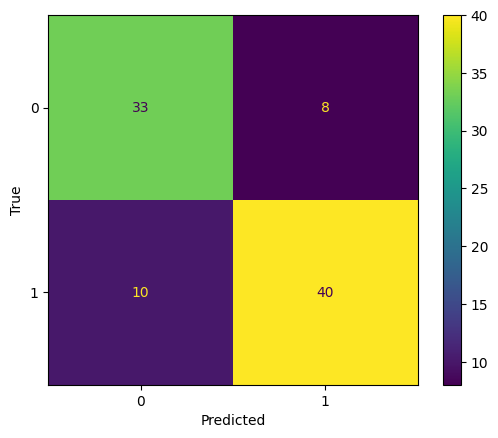

In [15]:
y_pred_1S = clf1S.predict(X_test)
#y_pred_2S = clf2S.predict(X_test)
#y_pred_3S = clf3S.predict(X_test)
#y_pred_4S = clf4S.predict(X_test)
y_pred_5S = clf5S.predict(X_test)
y_pred_6S = clf6S.predict(X_test)
y_pred_7S = clf7S.predict(X_test)
y_pred_ensembleS = eclfS.predict(X_test)

cf_matrixS = confusion_matrix(y_test, y_pred_ensembleS)
cmdS = ConfusionMatrixDisplay(cf_matrixS)
cmdS.plot()
cmdS.ax_.set(xlabel = 'Predicted', ylabel = 'True')

print('Acc. Score :', accuracy_score(y_test, y_pred_ensembleS))

print('F1 Score :', f1_score(y_test, y_pred_ensembleS))

1.0
F1 Score : 0.8514851485148515


,sex,cp,exang,oldpeak,slope,ca,thal
0,1.0,2.0,0.0,1.0,2.0,1.0,3.0
1,1.0,0.0,1.0,0.0,2.0,2.0,3.0
2,1.0,0.0,0.0,1.0,2.0,2.0,3.0
3,0.0,2.0,0.0,1.1,1.0,0.0,2.0
4,1.0,2.0,1.0,0.4,2.0,0.0,2.0


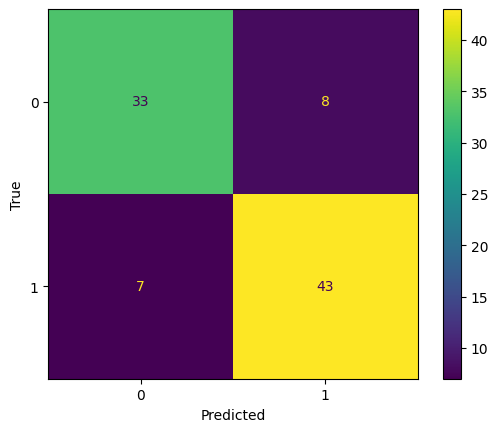

In [16]:
svcFS = SVC(kernel = 'linear', C = 1) 
selectorFS = RFE(svcFS, n_features_to_select = 7, step = 1) 
selectorFS.fit(X_train, y_train) 
selectorFS.ranking_

y_predFS = selectorFS.predict(X_test)

cf_matrixFS = confusion_matrix(y_test, y_predFS)
cmdFS = ConfusionMatrixDisplay(cf_matrixFS)
cmdFS.plot()
cmdFS.ax_.set(xlabel = 'Predicted', ylabel = 'True')


featuresFS = selectorFS.fit_transform(X_train, y_train) 
feature_idxFS = selectorFS.get_support(indices = True)
X_train = pd.DataFrame(X_train)
feature_namesFS = X_train.columns[feature_idxFS]

print(clf.score(X_train, y_train))

print('F1 Score :', f1_score(y_test, y_predFS))

featuresFS = pd.DataFrame(featuresFS, columns = feature_namesFS)
featuresFS.head()